## Definição do sinal a ser utilizado

Text(0,0.5,'sinal(x)')

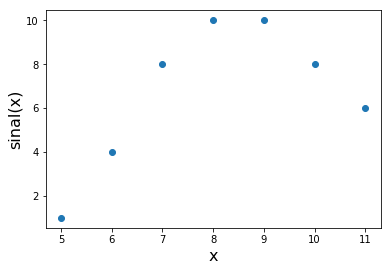

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(5, 12)
sinal = [1, 4, 8, 10, 10, 8, 6]
plt.plot(x, sinal, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16)

# 1. Interpolação do sinal com o dobro da taxa de amostragem

Temos os valores do sinal respectivos aos valores de x indo de 0 a 6 em intervalos de 1. Queremos obter um novo sinal superamostrado, definido para os valores de x entre 0 e 6 em intervalos de 0.5. Nesse novo sinal, já conhecemos qual será o valor do sinal em x=0, x=1, x=2, x=3, x=4, x=5 e x=6. O que precisamos descobrir são os valores do sinal em x=0.5, x=1.5, x=2.5, x=3.5, x=4.5 e x=5.5. Para isso podemos utilizar diferentes estratégias de interpolação.

## 1.1 Interpolação de vizinho mais próximo

Nesse caso, supomos que o valor desconhecido em cada ponto x é igual ao valor conhecido mais próximo do ponto x.

Text(0,0.5,'sinal(x)')

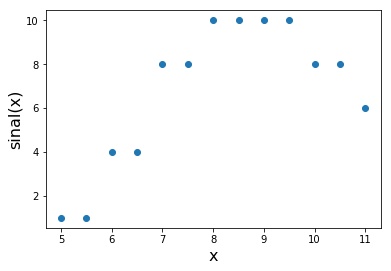

In [2]:
def interpolacao_vizinho_2x(sinal):
    sinal_interp = np.zeros(2*len(sinal)-1)
    for indice in range(len(sinal)-1):
        indice_interp = 2*indice
        sinal_interp[indice_interp] = sinal[indice]
        sinal_interp[indice_interp+1] = sinal[indice]
    sinal_interp[-1] = sinal[-1]
    
    return sinal_interp

x_interp = np.arange(5, 11.5, 0.5)
sinal_interp = interpolacao_vizinho_2x(sinal)

plt.plot(x_interp, sinal_interp, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16)    

## 1.2 Interpolação linear

Suponha que $x$ é o ponto onde o valor do sinal é desconhecido. A interpolação linear envolve utilizarmos os valores conhecidos do sinal que estão imediatamente antes e depois do ponto $x$. Seja $x_e$ e $x_d$ esses dois pontos, e $y_e$ e $y_d$ o valor do sinal nesses dois pontos. Definimos então uma reta que passa por esses dois pontos utilizando a equação de reta

\begin{equation}
y(x) = y_e + \frac{y_d-y_e}{x_d-x_e}(x-x_e)
\end{equation}

Podemos então calcular o valor de $y(x)$ no ponto $x$ desconhecido.

Text(0,0.5,'sinal(x)')

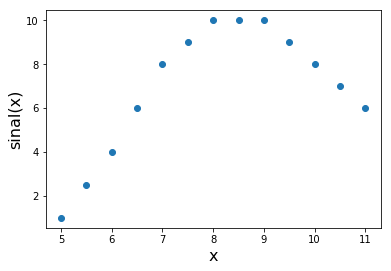

In [3]:
def interpolacao_linear_2x(sinal, x, x_interp):
    sinal_interp = np.zeros(2*len(sinal)-1)
    for indice in range(len(sinal)-1):
        indice_interp = 2*indice
        sinal_interp[indice_interp] = sinal[indice]

        x_e = x[indice]
        x_d = x[indice+1]
        y_e = sinal[indice]
        y_d = sinal[indice+1]

        y_x = y_e + (x_interp[indice_interp+1]-x_e)*(y_d-y_e)/(x_d-x_e)
        sinal_interp[indice_interp+1] = y_x
    sinal_interp[-1] = sinal[-1]
    
    return sinal_interp

x_interp = np.arange(5, 11.5, 0.5)
sinal_interp = interpolacao_linear_2x(sinal, x, x_interp)

plt.plot(x_interp, sinal_interp, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16)  

## 1.3 Interpolação utilizando correlação/convolução

In [4]:
from scipy.signal import correlate

def upsample_2x(sinal, filtro):
    '''Interpola sinal utilizando o filtro fornecido na variável filtro'''
    sinal_upsampled = np.zeros(2*len(sinal)-1)
    for indice in range(len(sinal)-1):
        indice_interp = 2*indice
        sinal_upsampled[indice_interp] = sinal[indice]
    sinal_upsampled[-1] = sinal[-1]

    sinal_interp = correlate(sinal_upsampled, filtro, mode='same')
    
    return sinal_interp

### Interpolação de vizinho mais próximo

Text(0.5,1,'Sinal interpolado')

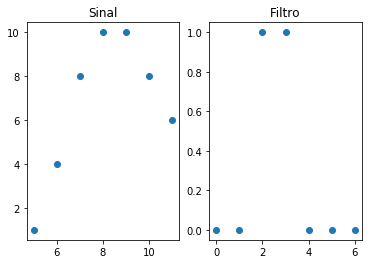

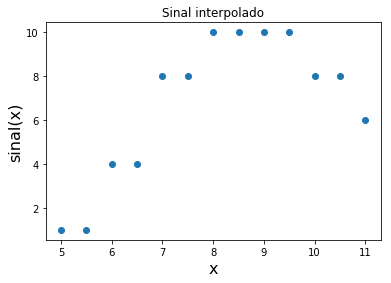

In [5]:
x_interp = np.arange(5, 11.5, 0.5)
# Cria filtro caixa
w = np.zeros(7)
w[2:4] = 1
sinal_interp_0 = upsample_2x(sinal, w)

plt.subplot(1, 2, 1)
plt.plot(x, sinal, 'o')
plt.title('Sinal')
plt.subplot(1, 2, 2)
plt.plot(w, 'o')
plt.title('Filtro')
         
plt.figure()
plt.plot(x_interp, sinal_interp_0, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16) 
plt.title('Sinal interpolado')

### Interpolação linear

Text(0.5,1,'Sinal interpolado')

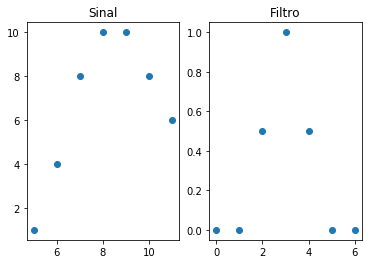

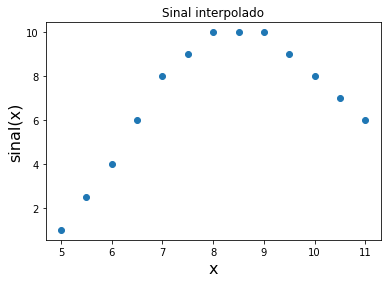

In [6]:
# Cria filtro triângulo, usado para interpolação linear (ordem 1)
# O filtro triângulo é definido pela correlação entre dois filtros caixa
w2 = correlate(w, w, mode='same')
w2 = w2/2
sinal_interp_1 = upsample_2x(sinal, w2)

plt.subplot(1, 2, 1)
plt.plot(x, sinal, 'o')
plt.title('Sinal')
plt.subplot(1, 2, 2)
plt.plot(w2, 'o')
plt.title('Filtro')
         
plt.figure()
plt.plot(x_interp, sinal_interp_1, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16) 
plt.title('Sinal interpolado')

### "Interpolação" cúbica (ordem 3)

Text(0.5,1,'Sinal interpolado')

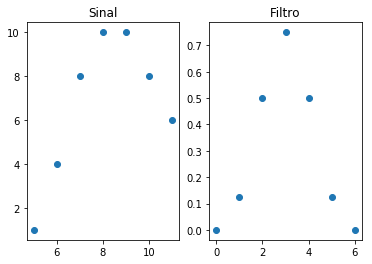

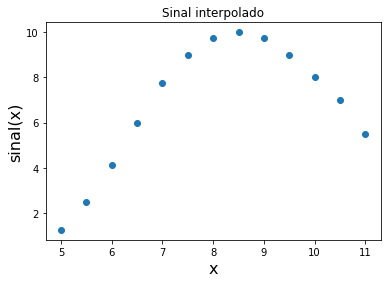

In [7]:
# Cria filtro de "interpolação" de ordem 3, definido pela correlação
# entre dois filtros triângulo. Esse filtro não é realmnete um filtro
# de interpolação, pois os valores do sinal interpolado nas posições
# x=0, x=1, x=2, etc não são os mesmos do sinal original
w3 = correlate(w2, w2, mode='same')
w3 = w3/2
sinal_interp_3 = upsample_2x(sinal, w3)

plt.subplot(1, 2, 1)
plt.plot(x, sinal, 'o')
plt.title('Sinal')
plt.subplot(1, 2, 2)
plt.plot(w3, 'o')
plt.title('Filtro')
         
plt.figure()
plt.plot(x_interp, sinal_interp_3, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16) 
plt.title('Sinal interpolado')

Text(0,0.5,'sinal(x)')

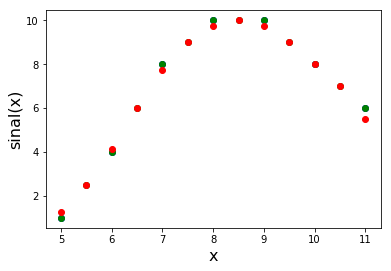

In [8]:
# Comparação entre sinais interpolados
plt.plot(x, sinal, 'bo')
plt.plot(x_interp, sinal_interp_1, 'go')
plt.plot(x_interp, sinal_interp_3, 'ro')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16) 

### Interpolação cúbica (ordem 3)

Text(0.5,1,'Interpolação cúbica')

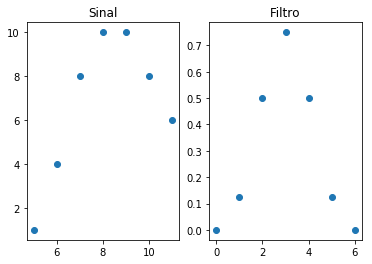

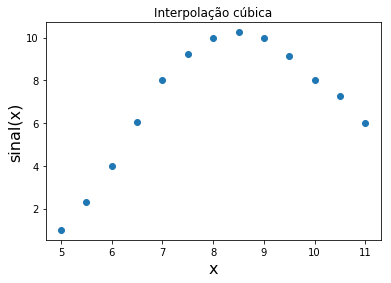

In [9]:
# Filtro de interpolação de ordem 3, conhecido como interpolação cúbica.
w_c = [-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]
sinal_interp_c = upsample_2x(sinal, w_c)

plt.subplot(1, 2, 1)
plt.plot(x, sinal, 'o')
plt.title('Sinal')
plt.subplot(1, 2, 2)
plt.plot(w3, 'o')
plt.title('Filtro')
         
plt.figure()
plt.plot(x_interp, sinal_interp_c, 'o')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16) 
plt.title('Interpolação cúbica')